# **Heuríticas de recomendação**

## **Heuríticas de recomendação e entendendo o que é colaboração**

In [1]:
import pandas as pd

filmes = pd.read_csv("C:/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("C:/ml-latest-small/ratings.csv")
notas.columns = ["usuarioID", "filmeId", "nota", "momento"]
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.describe()

,usuarioID,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Primeira tentativa de recomendação

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [5]:
filmes["total_de_votos"] = total_de_votos # fazendo um indice das colunas
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False) #tabela feita em pandas ela é do maior pro menor, ascending por padrão é True, ultilando False trocas a ordem da tabela.

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
32160,Twentieth Century (1934),Comedy,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN


## **Total de votos, média e possíveis dificuldades de Heuríticas simples**

In [7]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [8]:
notas_media = notas.groupby("filmeId").mean()["nota"]
notas_media.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [9]:
filmes["nota_media"] = notas_media
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [10]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [11]:
filmes.query("total_de_votos >= 10").sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [12]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 10")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


O que aprendemos nesta aula:

* Fazer a leitura de arquivos CSV com pandas;
* Renomear as colunas;
* Utilizar a função describe para ver as informações numéricas;
* Utilizar o value_counts para contar a frequência;
* Mudar o índice com a função set_index ();
* Usar a função loc[] para localizar valores;
* Fazer uma inclusão de coluna;
* Ordernar pela quantidade com a função sort_values(); Deixar a ordenação de maneira decrescente com o parâmetro
* ascending = False ;
* Agrupar os dados com a função groupby( ); Fazer uma query;

## **Recomendação beseada em similaridade de genero**

In [13]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [14]:
filmes.query("generos=='Adventure|Children|Fantasy'")

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294
126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,7.0,2.000000
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,9.0,3.055556
2043,Darby O'Gill and the Little People (1959),Adventure|Children|Fantasy,4.0,2.750000
2093,Return to Oz (1985),Adventure|Children|Fantasy,6.0,3.000000
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,8.0,2.500000
2399,Santa Claus: The Movie (1985),Adventure|Children|Fantasy,4.0,2.250000


In [15]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,12.0,3.541667
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294
56171,"Golden Compass, The (2007)",Adventure|Children|Fantasy,18.0,3.111111


In [16]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,12.0,3.541667
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294
56171,"Golden Compass, The (2007)",Adventure|Children|Fantasy,18.0,3.111111


## **visão geral de abordagens de recomendação**

* Collaborative filtering = filtro baseado na colaboração dos usuários
* content based filtering = Baseado em contéudos

## **Definindo a distância euclidiana entre usários**

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância



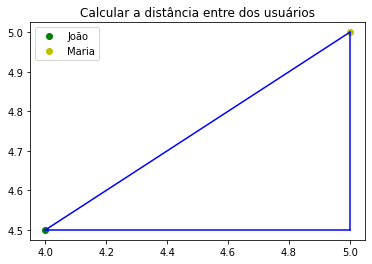

In [17]:
# joao = [4, 4.5]
# maria = [5, 5]

import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(["João", "Maria" ])
plt.title("Calcular a distância entre dos usuários")

plt.plot([4, 5], [4.5, 4.5], color = "b", linestyle = "-") # linestyle = linha
plt.plot([4, 5], [4.5, 5], color = "b", linestyle = "-")
plt.plot([5, 5], [4.5, 5], color = "b", linestyle = "-")


In [18]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria



array([-1. , -0.5])

In [19]:
from math import sqrt

def pitagoras(a, b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y) #sqrt = tira a raiz quadrada da operação.

pitagoras(joao, maria)

1.118033988749895

In [20]:
def pitagoras(a,b):
    return np.linalg.norm(a - b) #linalg.norm linha linear que faz a norm do nosso vetor

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre dos usuários')

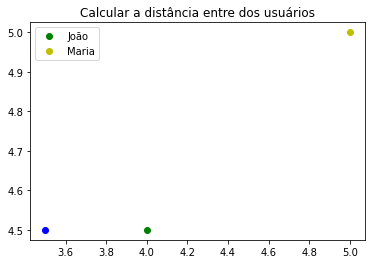

In [21]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(["João", "Maria" ])
plt.title("Calcular a distância entre dos usuários")

In [22]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [23]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a - b)

## **Implementando a distância entre usuários no nosso dataset**

In [24]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query("usuarioID==1")
    notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId") #set_index = defini um index
    return notas_do_usuario
    # notas_do_usuario.loc[1590] #loc = localiza pelo index

In [25]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [26]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [27]:
usuario4.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [28]:
usuario1.join(usuario4, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
# join = junta duas tabelas.
# suffix = diferencia colunas iguais.

,nota_esquerda,nota_direita
filmeId,,
1,4.0,4.0
3,4.0,4.0
6,4.0,4.0
47,5.0,5.0
50,5.0,5.0
...,...,...
3744,4.0,4.0
3793,5.0,5.0
3809,4.0,4.0


In [29]:
diferencas = usuario1.join(usuario4, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
diferencas['nota_esquerda']
diferencas['nota_direita']

filmeId
1       4.0
3       4.0
6       4.0
47      5.0
50      5.0
       ... 
3744    4.0
3793    5.0
3809    4.0
4006    4.0
5060    5.0
Name: nota_direita, Length: 232, dtype: float64

In [30]:
diferencas = usuario1.join(usuario4, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

0.0

In [33]:
def distancia_de_usuario(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usu ario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
    return distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

distancia_de_usuario(1, 4)

0.0

O que aprendemos nesta aula:

* Procurar dados similares em relação às características deles;
* Mostrar graficamente a distância entre os dados;
* Legendar e criar uma linha no gráfico;
* Utilizar a função sqrt para gerar a raiz quadrada;
* Criar um array do numpy para fazer a subtração das listas;
* Utilizar a função np_linalg.norm para gerar o valor das distâncias;
* Usar a função join para juntar os dados;
* Utilizar o lsufix e o rsufix para juntar os dados adjacentes;
* Utilizar a função dropna para remover valores nulos.